<a href="https://colab.research.google.com/github/sanjprasad/Classification/blob/main/HW_Classification_Random_Forest%2C_SVM_and_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and preparing the data

In this section, I'm importing the proper libraries that will be used in this assignment. I'm also loading the dataset and formatting it to be used. Finally, I create the testing and training sets that will be used with this classification.

In [ ]:
from pandas.core.window.indexers import VariableOffsetWindowIndexer
#importing pandas and numpy the standard libraries
import pandas as pd
import numpy as np

#import standard classification tools from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

# import model class (SVC stands for Support Vector Classification)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#visualization imports
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

template = 'ggplot2'
test_size = 0.8 #increased the test size as some of the pathologic states were missing

#loading in the dataset - I combined the dataset and the pathologic stage variable in excel and uploaded my dataset to colab instead. 
data = pd.read_table('/content/classificationHW.csv', sep=',', header=(0))

#prepare data
features = data.iloc[1:, 0].values
data=data.drop(['ID'], axis = 1) 
dataT = np.transpose(data)


In [ ]:
data #making sure the data looks how I want it to

,TCGA_DD_A1EC_01A,TCGA_ES_A2HT_01A,TCGA_DD_A3A8_01A,TCGA_DD_A1EL_01A,TCGA_DD_A3A3_01A,TCGA_EP_A3RK_01A,TCGA_DD_A11D_01A,TCGA_DD_A39X_01A,TCGA_DD_A11C_01A,TCGA_DD_A11B_01A,...,TCGA_BC_A110_01A,TCGA_EP_A12J_01A,TCGA_EP_A26S_01A,TCGA_FV_A23B_01A,TCGA_DD_A39V_01A,TCGA_DD_A39W_01A,TCGA_DD_A3A2_01A,TCGA_FV_A2QR_01A,TCGA_DD_A3A4_01A,TCGA_FV_A3I1_01A
0,Stage I,Stage I,Stage II,Stage II,Stage I,Stage IIIA,Stage I,Stage I,Stage I,Stage I,...,[Not Available],Stage I,Stage I,Stage II,Stage II,Stage III,Stage I,Stage I,Stage IIIA,Stage II
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.2,0,2,8,3.15,3.31,2.26,3.75,11.18,12.91,...,0,14.61,11.42,48.06,3.96,1.67,4.23,0,0,7.73
3,8.8,3,0,5,1.85,8.69,3.74,6.25,10.82,4.09,...,3,9.39,1.58,67.94,2.04,3.33,5.77,0,7,13.27
4,144,104.55,196.73,614.74,54.87,160.63,69.86,225.26,167.17,229.61,...,65.9,180.51,286.78,303.27,126.07,216.06,128.6,224.42,116.57,155.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,12725.00,5090.00,1877.00,3098.00,2584.00,6402.00,4185.00,6012.00,4425.00,4591.00,...,7735.00,1616.00,2000.00,6540.00,4873.00,1098.00,5560.00,9525.00,381.00,13617.00
20528,4548.00,963.00,836.00,2076.00,182.00,1243.00,316.00,1181.00,1175.00,2312.00,...,258.00,1680.00,2129.00,1542.00,417.00,1300.00,1069.00,1024.00,501.00,1016.00
20529,1494.00,271.00,547.00,1780.00,284.00,763.00,358.00,343.00,1342.00,877.00,...,284.00,1589.00,1717.00,1768.00,306.00,1219.00,817.00,988.00,985.00,1072.00
20530,8.00,4.00,1.00,14.00,0.00,10.00,2.00,3.00,11.00,5.00,...,3.00,18.00,11.00,2.00,4.00,2.00,2.00,7.00,12.00,1.00


In [ ]:
#X is the data, y is the lables (classes)
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

class_label= dataT[0]

#creating the training and testing sets
X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)



# Applying three classification methods to this data

First looking at some of the sample distribution.



In [ ]:
#how many 'Stage I' samples are there in the original dataset?
print(len(y[y == 'Stage I']))

16


In [ ]:
#how many 'Stage II' samples are there in the original dataset?
print(len(y[y == 'Stage II']))

8


In [ ]:
#how many 'Stage III' samples are there in the original dataset?
print(len(y[y == 'Stage III']))

3


In [ ]:
#how many 'Stage IIIA' samples are there in the original dataset?
print(len(y[y == 'Stage IIIA']))

6


In [ ]:
#how many 'Stage IIIC' samples are there in the original dataset?
print(len(y[y == 'Stage IIIC']))

1


In [ ]:
#how many 'Stage IV' samples are there in the original dataset?
print(len(y[y == 'Stage IV']))

1


In [ ]:
#how many '[Not Available]' samples are there in the original dataset?
print(len(y[y == '[Not Available]']))

7


In [ ]:
#comparing the proportions of the possible stages
for stage in classes:
  print(stage, ": ", round(len(y_test[y_test == stage])/len(y[y == stage]),2))

Stage I :  0.75
Stage II :  0.88
Stage III :  0.67
Stage IIIA :  0.83
Stage IIIC :  1.0
Stage IV :  1.0
[Not Available] :  0.86


Trying the SVC method!

In [ ]:
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"
#SVC Classification- done just like how it is in the notebook shared with us
# using a linear kernel, it is the only kernel which allows us to use features selection
model = LinearSVC(C=1.0)
model.fit(X_train, y_train)


LinearSVC()

In [ ]:
# after training we can predict labels for the test samples and check the accuracy of the model
predictions = model.predict(X_test)

c_matrix = confusion_matrix(y_test,predictions)
cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

In [ ]:
 model_accuracy

0.23529411764705882

Above, I trained the model with SVC classification and then predicted the labels for the test samples. I also checked the model's accuracy and found it to be 0.0.23529411764705882. 

Below I show the classification results!

In [ ]:
clsf_report = pd.DataFrame(cr).transpose()
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

Precision is the ratio of true positives to total positives and essentially refers to accuracy, so a higher precision score indicates a low rate of false positives. 

Recall is the ratio of true positives to all the actual observations (so total true positives and false negatives) and essentially refers to sensitivity of the model. 

F1 score is the weighted average of precision and recall so it takes false positives and false negatives into account in the score. F1 score is one of the most important parameter as it can be more useful than precision. 

Support is the number of occurrences of each class.

Looking at the above graph, we see low parameters for all of the classes with the exception of the support parameter. Stage I has the highest recall of 0.5, which is not very good for this model. The F1 scores and precision are all below 0.5 for each class with the highest being 0.387 for F1 score and 0.3157 for precision for stage I. 

In [ ]:
#Running PCA

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 

n_components=4
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%' for i in range(n_components)}
template = 'ggplot2'

# x and y given as array_like objects
figPCA2D = px.scatter(xpca, x=0, y=1, color=y, 
                      labels=dataT1.index,
                      hover_name = dataT1.index,
                      title="2D PCA for Labels")
figPCA2D.update_layout(width=1000, height=800, template=template)
figPCA2D.show()

In [ ]:
#Creating a confusion matrix of the data
CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

heat = go.Heatmap(z = CM_df, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

Next, we can do feature selection to get rid of the noise and only see the relevant information. 

In [ ]:
# this is only available in the case of a linear kernel
top_features_count = 20

# we use median of weights from all classes
vector_weights = np.median(model.coef_, axis=0)
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]

d = {'Features':features[top_coefficients], 'Weight':vector_weights[top_coefficients]}
df_features = pd.DataFrame(d)

#plot feature significance
fig = px.bar(y=df_features.Features, x=df_features.Weight, template=template)
fig.update_layout(width=700, height=1000, template=template, title="Feature Significance")
fig.show()

Time to try the Random Forest Classification Method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=True)

#fit model on training data
model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished


RandomForestClassifier(n_estimators=500, verbose=True)

In [ ]:
#Predict test data and checking the accuracy

predictions = model.predict(X_test)
c_matrix = confusion_matrix(y_test,predictions)

CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

model_accuracy

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


0.3235294117647059

We see above that the model accuracy for the Random Forest classification method is 0.3235294117647059


In [ ]:
clsf_report = pd.DataFrame(cr).transpose()
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

Above, we see that the recall for Stage 1 is high at almost 0.916666 and with a precision of 0.3928. The recall is good for this class as it's above 0.5, but the precision is still pretty low. The F1 score is also decently good at about 0.55 as well for this class. 

Below we can make a confusion matrix and create a PCA plot:

In [ ]:
#Making a confusion matrix
heat = go.Heatmap(z = c_matrix, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

In [ ]:
dataT1 = dataT
dataT1 = dataT1.iloc[:,1:len(dataT1.columns)]
dataT1

scaled = StandardScaler() 
scaled.fit(dataT1) 
scaled_data = scaled.transform(dataT1) 

#Run Principal Component Analysis
n_components=4
pca = PCA(n_components) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

labels = {str(i): f'PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%' for i in range(n_components)}
template = 'ggplot2'

# x and y given as array_like objects
figPCA2D = px.scatter(xpca, x=0, y=1, color=y, 
                      labels=dataT1.index,
                      hover_name = dataT1.index,
                      title="2D PCA for Labels")
figPCA2D.update_layout(width=1000, height=800, template=template)
figPCA2D.show()

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

RF_df = pd.DataFrame(forest_importances.sort_values(ascending=False))
RF_df.columns = ['Feature']

#plot feature significance
fig = px.bar(RF_df[0:20], template=template)
fig.update_layout(width=1000, height=700, template=template, title="Top 20 Features by Significance")
fig.show()

Above I do feature selection again to remove noise!

In [ ]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


Now it's time for the third classification method! Below is Lazy classifier

In [ ]:
warnings.filterwarnings('ignore')

!pip install lazypredict -q

In [ ]:
#import necessary modules
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 29/29 [00:25<00:00,  1.15it/s]


In [ ]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

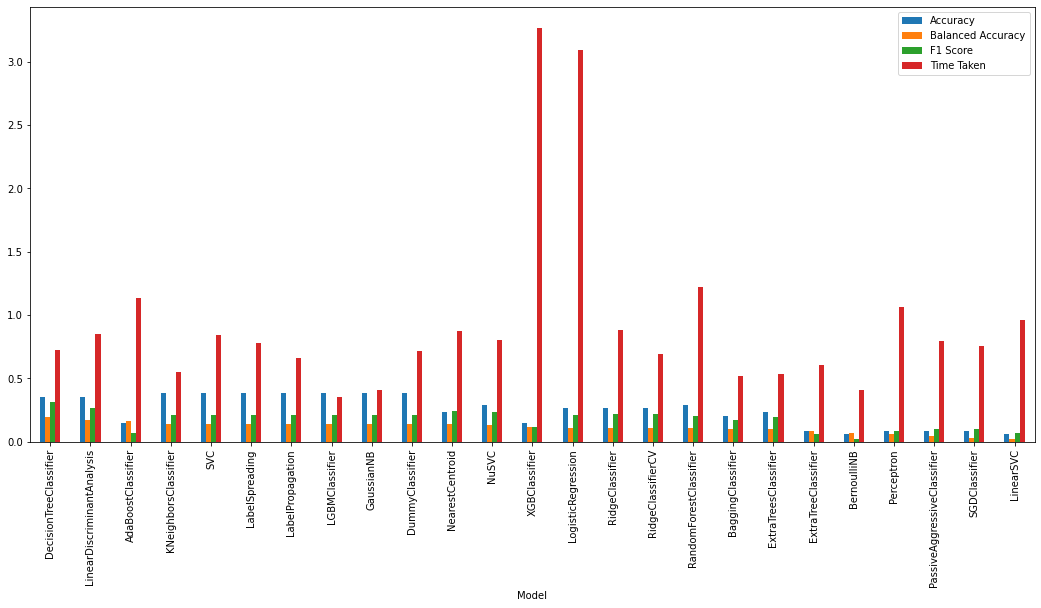

In [ ]:
models_c.plot.bar(figsize = (18,8));

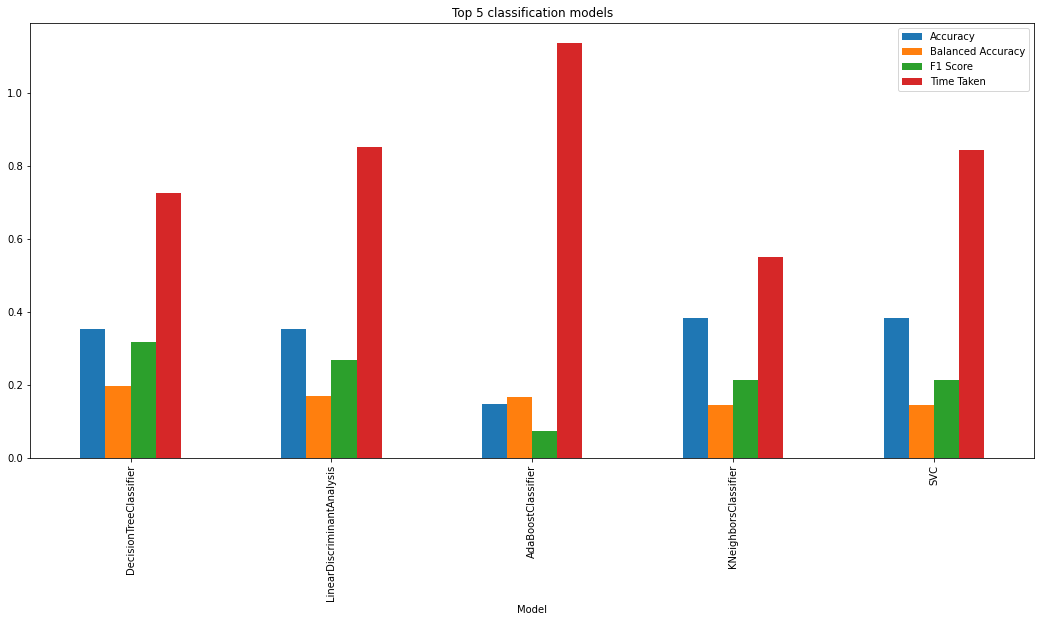

In [ ]:
models_c.iloc[0:5].plot.bar(figsize = (18,8), title="Top 5 classification models");

# Summary

In this notebook, I used the TCGA Risk Factor dataset and the corresponding clinical annotation data. I utilized Excel in order to organize and reformat the data which included pulling the pathologic state variable and matching it to the corresponding samples in order to have the pathologic state associated with each sample in the dataset with all the genes and expression. This was done by hand as I alphabetized the clinical annotation dataset and then matched the corresponding sample name to add in a row called "Stage" which had the pathologic state. As some of the stages only had one sample, I increased the test size parameter to 0.8 in order to have them all show in the resulting graphs be included in the analysis. 

Following the data preparation, I split the data into test and train datasets, and then I used these sets in my classification models. I began with the Support Vector Classifier (SVC) method, which only had an accuracy of about 23%. This was only further visually shown in the classification report graph, which showed very low scores for all the parameters and the PCA plot which showed no distinct grouping. Stage I seemed to have the most success with this method, although it was still rather low as shown by the parameters in the classification report as we saw the highest recall of 0.5, which is not very good for this model. The F1 scores and precision were 0.387 and 0.3157 respectively for stage I. After this, I used feature selection and found the top 5 marker genes to be FTL2512, APOA2336, SEPP16414, CLU1191 and TF7018 with FTL2512 having the highest value of 0.00208.

The second classification method I tried was the Random Forest Classification Method. This method yielded an accuracy of 32.5%, which was much better than the SVC method. This was shown by the classification report where we can see that the recall for Stage 1 is high at almost 0.916666 and the precision is at 0.3928. The recall is good for this class as it's above 0.5, but the precision is still pretty low. The F1 score is also decently good at about 0.55 as well for this class. Thus, the model showed the most success with Stage I as well. The confusion matrix showed that 10 of the samples were correctly classified with this method. Feature selection was done again with the five marker genes bein ZWINT11130, TAF383860, MRPL965005, PRCC5546, STK2510494, with the corresponding values of 0.0038, 0.0033, 0.0032,0.0030, 0.0027.

Interestingly, the significant features were different for both models, but since neither model had a high accuracy it's hard to determine which is more correct. 

Lastly, I used the Lazy Predict classifier method to look at many of the models that would allow comparing of time taken, F1 scores and accuracy. The top models found were DecisionTreeClassifier, LinearDiscriminantAnalysis, AdaBoostClassifier, KNeighborsClassifer, and SVC. It's interesting that SVC was found to be on this list, considering the accuracy was lower than the Random Forest method. While AdaBoostClassifier was found to be the fastest, it had a low F1 score. The highest F1 score belonged to the Decision Tree Classifier method. As we had discussed in class, F1 scores are a significant parameter to look at and more important than speed, so the Decsion Tree classifier is a model of interest to look at. Interestingly, the accuracy of SVC was fairly high which was different than seen here. 


